In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [40]:
df =pd.read_csv("bank.csv", delimiter = ';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [85]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4516    False
4517    False
4518    False
4519    False
4520    False
Length: 4521, dtype: bool

In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
df['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [7]:
df['job'].value_counts()

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

In [8]:
cat = []
num = []
for x in df.columns:
     if df[x].dtypes == object:
      cat.append(x)
     else:
         num.append(x)
cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [9]:
df['education'].nunique()

4

In [10]:
for i in cat :
    print(f'The number of unique value of {i} is {df[i].nunique()}')
    print(f'The unique values in {i} are {df[i].unique()}')
    print(df[i].value_counts())
    print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")

The number of unique value of job is 12
The unique values in job are ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
The number of unique value of marital is 3
The unique values in marital are ['married' 'single' 'divorced']
marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
The number of unique value of education is 4
The unique values in education are ['primary' 'secondary' 'tertiary' 'unknown']
education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


In [ ]:
#Uni variate EDA

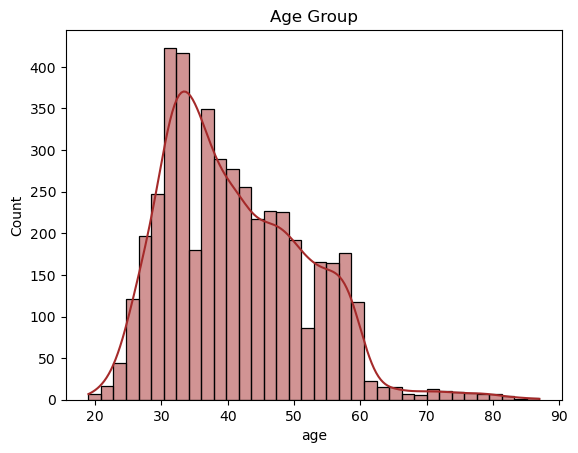

In [12]:
sns.histplot(data=df, x='age', color='brown', kde=True)
plt.title('Age Group')
plt.show()

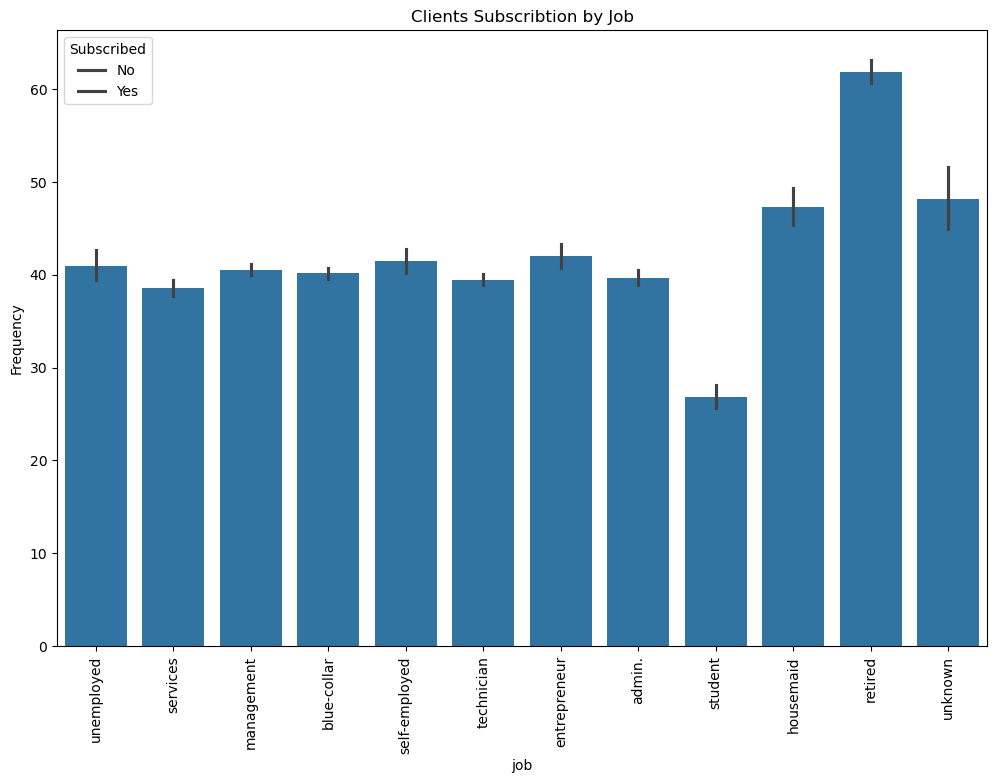

In [13]:
plt.figure(figsize=(12,8))
sns.barplot(data=df,  x='job', y='age', )
plt.title(f'Clients Subscribtion by Job')
plt.xlabel('job')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.legend(title='Subscribed', labels=['No', 'Yes'])
plt.show()

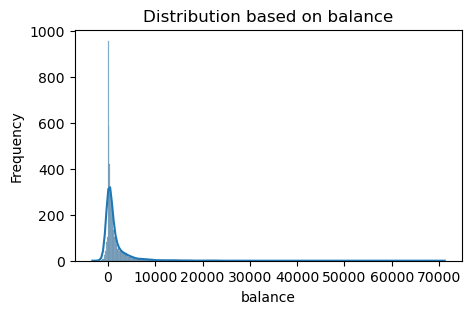

In [14]:
plt.figure(figsize=(5,3))
sns.histplot(data=df, x="balance", kde=True)
plt.title('Distribution based on balance')
plt.xlabel('balance')
plt.ylabel('Frequency')
plt.show()

In [15]:
cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

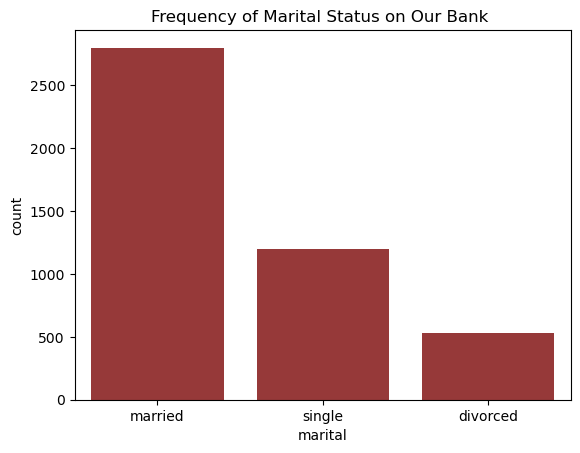

In [16]:
sns.countplot(data=df, x ='marital', color='Brown')
plt.title('Frequency of Marital Status on Our Bank ')
plt.show()

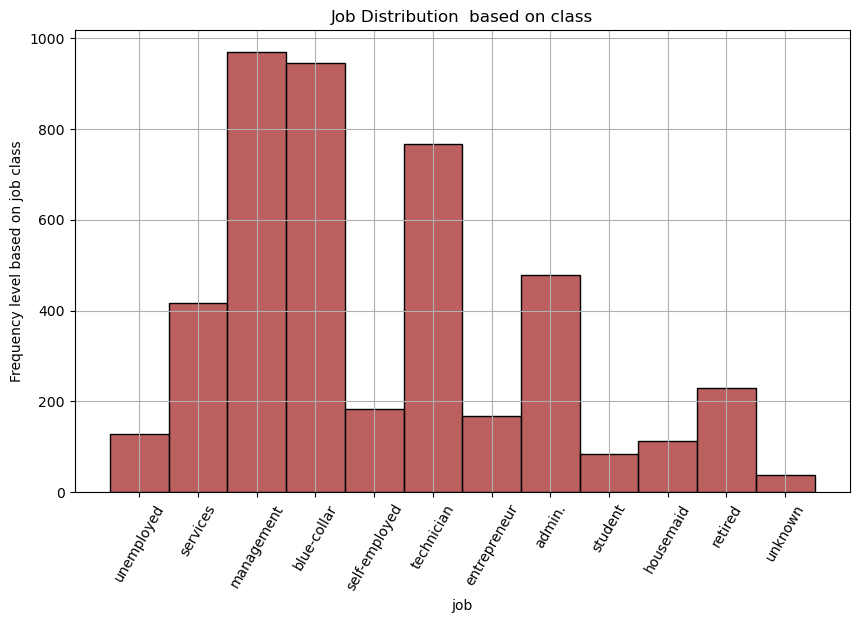

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="job", color='brown')
plt.title("Job Distribution  based on class")
plt.xticks(rotation=60)
plt.ylabel("Frequency level based on job class")
plt.grid(True)
plt.show()

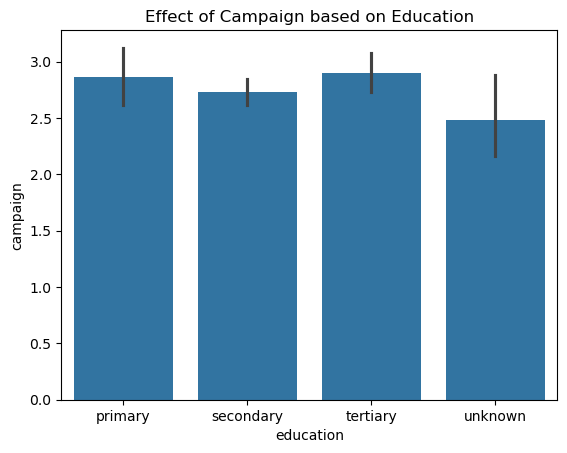

In [18]:
sns.barplot(data=df, x="education", y="campaign")
plt.title('Effect of Campaign based on Education')
plt.show()

In [ ]:
#Bi variate EDA

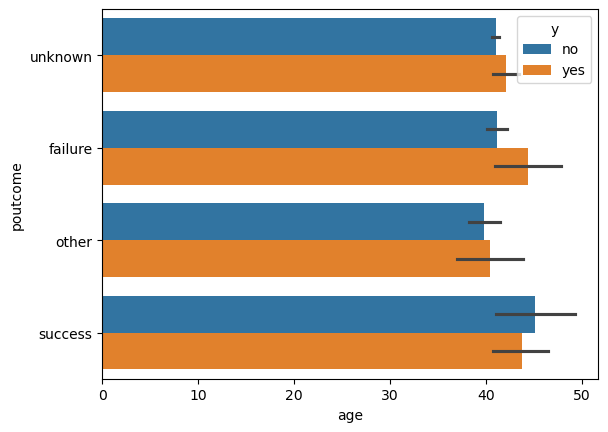

In [155]:
sns.barplot(data=df, x="age", y="poutcome", hue="y")
plt.show()

In [20]:
num_df = df[num]

In [21]:
num_df.corrwith(df['balance'])

age         0.083820
balance     1.000000
day        -0.008677
duration   -0.015950
campaign   -0.009976
pdays       0.009437
previous    0.026196
dtype: float64

In [151]:
#Multi Variate EDA

<Axes: >

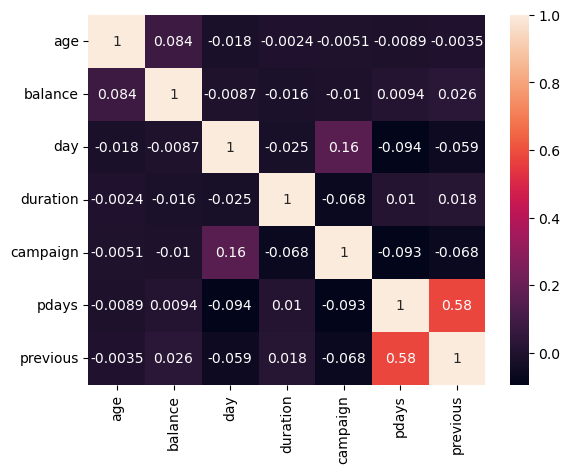

In [22]:
sns.heatmap(data= num_df.corr(), annot= True)

In [23]:
cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [24]:
cat_columns=['job','marital','education','default','housing','loan','contact','month','poutcome']

In [25]:
df_encoded = pd.get_dummies(df[cat_columns])

In [26]:
df_encoded

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
4,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4517,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4518,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4519,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [27]:
df= df.drop(cat_columns, axis=1)

In [28]:
df.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y'],
      dtype='object')

In [29]:
df = df.join(df_encoded)

In [30]:
X= df.drop('y', axis=1)

In [31]:
y = df['y']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state= 32, stratify=y)

In [34]:
from sklearn.linear_model import  LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [35]:
m =LogisticRegression(random_state=0)
m.fit(X_train, y_train)

C:\Users\AZARECOEEGRSTUDENT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [36]:
m_pred= m.predict(X_test)

In [37]:
m_pred

array(['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'n

In [105]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, f1_score, recall_score

In [119]:
def matrics(y_test,m_pred):
    acc = accuracy_score(y_test, m_pred)
    f1 = f1_score(y_test, m_pred, pos_label='yes')
    pr = precision_score(y_test, m_pred, pos_label='yes')
    rc = recall_score(y_test, m_pred, pos_label='yes')
    return (acc, f1, pr, rc)    

In [143]:
m_acc, m_f1, m_pr, m_rc = matrics(y_test, m_pred)

In [145]:
pd.crosstab(y_test, m_pred)

col_0,no,yes
y,,
no,781,20
yes,83,21


In [113]:
print(classification_report(y_test, m_pred))

              precision    recall  f1-score   support

          no       0.90      0.98      0.94       801
         yes       0.51      0.20      0.29       104

    accuracy                           0.89       905
   macro avg       0.71      0.59      0.61       905
weighted avg       0.86      0.89      0.86       905



In [147]:
score= [m_acc,m_acc, m_f1, m_f1, m_pr, m_pr, m_rc, m_rc]
def met_df(scores):
    alg = ['M','N','M','N','M','N', 'M','N']
    met = ['Accuracy', 'Accuracy', 'F1_score', 'F1_score', 'Precision_score', 'Precision_score', 'Recall_score','Recall_score']
    base_met = pd.DataFrame({"Matrices": met, "Algorithm": alg, "Score": scores})
    return base_met

In [149]:
base_matrics= met_df(score)
base_matrics

,Matrices,Algorithm,Score
0,Accuracy,M,0.886188
1,Accuracy,N,0.886188
2,F1_score,M,0.289655
3,F1_score,N,0.289655
4,Precision_score,M,0.512195
5,Precision_score,N,0.512195
6,Recall_score,M,0.201923
7,Recall_score,N,0.201923
